In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [2]:
data=pd.read_excel('2단계 하락 상품.xlsx')
data.head()

,제품명,구매수,상품설명
0,[La belle rose]언더 베이직 유넥티,30,매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
1,사나 슬림핏 골지가디건,25,부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
2,어링 모헤어니트,25,부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
3,카디비 머메이드 롱스커트,18,고급스럽고 우아한 머메이드라인의 볼륨감있는 바디라인으로 연출되는 롱스커트♡
4,퓨얼 플리츠 롱스커트,18,"움직일때마다 살랑 살랑,청순한 실루엣으로 연출해주는 롱 플리츠 스커트♥<br>부드럽..."


In [3]:
#경고제어
import warnings
warnings.simplefilter("ignore") # 일치하는 경고 인쇄 x, simplefilter : 경고 필터 명세 목록에 간단한 항목을 삽입

#텍스트 분석에 필요한 konlpy 불러오기 및 버전 확인
import konlpy
konlpy.__version__

'0.5.2'

In [4]:
#KoNLPy의 OKT(형태소 분석기) 불러오기
from konlpy.tag import Okt

okt=Okt()
print(okt.pos("안녕하세요"))

[('안녕하세요', 'Adjective')]


In [5]:
!pip install nltk

In [6]:
import nltk
from konlpy.tag import Okt
t=Okt()

In [8]:
data.상품설명.astype('str')

0                매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
1                       부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
2                 부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
3             고급스럽고 우아한 머메이드라인의 볼륨감있는 바디라인으로 연출되는 롱스커트♡
4     움직일때마다 살랑 살랑,청순한 실루엣으로 연출해주는 롱 플리츠 스커트♥<br>부드럽...
5                                                   nan
6               청순+섹시♥꾸민듯 안꾸민듯 포인트 주기 좋은 슬림핏 골지 티셔츠에요:)
7         까다롭게 제작한 프롬데이원 메이드 데님♥<br>실물로 퀄리티를 확인해 주세요:))
8     부들 부들 쫀쫀하고 소프트한 텍스쳐의 깔끔한 레깅스 팬츠♥<br>꾸안꾸룩으로 연출하...
9                      차분한 색감으로 지금부터 쭉 활용하기 좋은 골지니트에요:)
10    한여름에도 착용 가능한 산뜻한 린넨 골지 가디건♥<br>단독으로,아우터로도 다양하게...
11        프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
12                      따스한 분위기로 연출되는 색감예쁜 체크 미디스커트에요:)
13                   글램한 바디라인♡꾸안꾸 스타일로 착용하기 좋은 니트 롱원피스♥
14               활용도 만점♡다양하게 레이어드하기 좋아 강력 추천드리는 브이넥가디건♥
15    크롭 기장감으로 높은 활용도♡ 스커트나 팬츠위에 툭툭! 원피스 위에 입어주어도 예뻐요:)
16                           포근한 무드♥데일리한 분위기의 반폴라니트에요:)
17             따스하고 무드있는 컬러 구성+극강의 편안함을 선보여줄 핀턱 

In [10]:
content_text=''

for each_line in data.상품설명.astype('str'):
    content_text=content_text + each_line + '\n'

In [11]:
print(data.상품설명)
print(data.shape)

0                매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
1                       부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
2                 부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
3             고급스럽고 우아한 머메이드라인의 볼륨감있는 바디라인으로 연출되는 롱스커트♡
4     움직일때마다 살랑 살랑,청순한 실루엣으로 연출해주는 롱 플리츠 스커트♥<br>부드럽...
5                                                   NaN
6               청순+섹시♥꾸민듯 안꾸민듯 포인트 주기 좋은 슬림핏 골지 티셔츠에요:)
7         까다롭게 제작한 프롬데이원 메이드 데님♥<br>실물로 퀄리티를 확인해 주세요:))
8     부들 부들 쫀쫀하고 소프트한 텍스쳐의 깔끔한 레깅스 팬츠♥<br>꾸안꾸룩으로 연출하...
9                      차분한 색감으로 지금부터 쭉 활용하기 좋은 골지니트에요:)
10    한여름에도 착용 가능한 산뜻한 린넨 골지 가디건♥<br>단독으로,아우터로도 다양하게...
11        프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
12                      따스한 분위기로 연출되는 색감예쁜 체크 미디스커트에요:)
13                   글램한 바디라인♡꾸안꾸 스타일로 착용하기 좋은 니트 롱원피스♥
14               활용도 만점♡다양하게 레이어드하기 좋아 강력 추천드리는 브이넥가디건♥
15    크롭 기장감으로 높은 활용도♡ 스커트나 팬츠위에 툭툭! 원피스 위에 입어주어도 예뻐요:)
16                           포근한 무드♥데일리한 분위기의 반폴라니트에요:)
17             따스하고 무드있는 컬러 구성+극강의 편안함을 선보여줄 핀턱 

In [12]:
tokens_ko=t.morphs(content_text)
tokens_ko

['매',
 '일',
 '매일',
 '입고',
 '싶은',
 '차르르',
 '핏',
 '베이직',
 '티셔츠',
 '♡',
 '컬러',
 '별',
 '소장',
 '추천',
 '드려요',
 ':',
 'D',
 '\n',
 '부들부들한',
 '착용',
 '감',
 '으로',
 '손',
 '이',
 '자주',
 '갈',
 '슬림핏',
 '골지',
 '가디건',
 '♡',
 '\n',
 '부드러운',
 '착용',
 '감',
 '♥',
 '부',
 '해보이지',
 '않고',
 '여리',
 '여리한',
 '무드',
 '의',
 '골지',
 '니트',
 '에요',
 ':)',
 '\n',
 '고급스럽고',
 '우아한',
 '머메이드',
 '라인',
 '의',
 '볼륨',
 '감있는',
 '바디',
 '라인',
 '으로',
 '연출',
 '되는',
 '롱',
 '스커트',
 '♡',
 '\n',
 '움직일',
 '때',
 '마다',
 '살랑',
 '살랑',
 ',',
 '청순한',
 '실루엣',
 '으로',
 '연출',
 '해주는',
 '롱',
 '플',
 '리츠',
 '스커트',
 '♥',
 '<',
 'br',
 '>',
 '부드럽고',
 '은은한',
 '컬러',
 '감',
 '이',
 '너무',
 '예쁘답니다',
 '!',
 '\n',
 'nan',
 '\n',
 '청순',
 '+',
 '섹시',
 '♥',
 '꾸민듯',
 '안',
 '꾸민듯',
 '포인트',
 '주기',
 '좋은',
 '슬림핏',
 '골지',
 '티셔츠',
 '에요',
 ':)',
 '\n',
 '까다롭게',
 '제작',
 '한',
 '프롬',
 '데이',
 '원',
 '메이드',
 '데님',
 '♥',
 '<',
 'br',
 '>',
 '실물',
 '로',
 '퀄리티',
 '를',
 '확인',
 '해',
 '주세요',
 ':))',
 '\n',
 '부들',
 '부들',
 '쫀쫀',
 '하고',
 '소프트',
 '한',
 '텍스쳐',
 '의',
 '깔끔한',
 '레깅스',
 '팬츠',
 '♥',


In [13]:
ko=nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

344
191


In [15]:
ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200) # 가장 많이 나온 단어 100개

[('\n', 20),
 ('♥', 13),
 (':)', 8),
 ('으로', 7),
 ('의', 7),
 ('한', 7),
 ('♡', 6),
 ('골지', 6),
 ('에요', 5),
 ('<', 5),
 ('br', 5),
 ('>', 5),
 ('착용', 4),
 ('감', 4),
 ('니트', 4),
 ('연출', 4),
 ('스커트', 4),
 ('좋은', 4),
 ('로', 4),
 ('하기', 4),
 ('활용', 4),
 ('티셔츠', 3),
 ('컬러', 3),
 ('추천', 3),
 ('가디건', 3),
 ('라인', 3),
 ('롱', 3),
 ('도', 3),
 (':', 2),
 ('D', 2),
 ('이', 2),
 ('슬림핏', 2),
 ('무드', 2),
 ('바디', 2),
 ('되는', 2),
 ('살랑', 2),
 (',', 2),
 ('부드럽고', 2),
 ('!', 2),
 ('+', 2),
 ('꾸민듯', 2),
 ('포인트', 2),
 ('프롬', 2),
 ('데이', 2),
 ('원', 2),
 ('퀄리티', 2),
 ('부들', 2),
 ('쫀쫀', 2),
 ('팬츠', 2),
 ('색감', 2),
 ('다양하게', 2),
 ('스퀘어', 2),
 ('분위기', 2),
 ('원피스', 2),
 ('넥', 2),
 ('위', 2),
 ('에', 2),
 ('와이드', 2),
 ('매', 1),
 ('일', 1),
 ('매일', 1),
 ('입고', 1),
 ('싶은', 1),
 ('차르르', 1),
 ('핏', 1),
 ('베이직', 1),
 ('별', 1),
 ('소장', 1),
 ('드려요', 1),
 ('부들부들한', 1),
 ('손', 1),
 ('자주', 1),
 ('갈', 1),
 ('부드러운', 1),
 ('부', 1),
 ('해보이지', 1),
 ('않고', 1),
 ('여리', 1),
 ('여리한', 1),
 ('고급스럽고', 1),
 ('우아한', 1),
 ('머메이드', 1),
 ('볼륨', 1

In [17]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','를','2017','들','데','..','의','때','겠','고','게','네요','한','일','할','10','?','하는','06','주','려고','인데','거','좀','는데','-','ㅎㅎ','하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','지','있','못','후','중','줄','6','과','어떤','기본','!!','단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200)

[('\n', 20),
 ('♥', 13),
 (':)', 8),
 ('♡', 6),
 ('골지', 6),
 ('에요', 5),
 ('<', 5),
 ('br', 5),
 ('>', 5),
 ('착용', 4),
 ('감', 4),
 ('니트', 4),
 ('연출', 4),
 ('스커트', 4),
 ('좋은', 4),
 ('하기', 4),
 ('활용', 4),
 ('티셔츠', 3),
 ('컬러', 3),
 ('추천', 3),
 ('가디건', 3),
 ('라인', 3),
 ('롱', 3),
 (':', 2),
 ('D', 2),
 ('슬림핏', 2),
 ('무드', 2),
 ('바디', 2),
 ('되는', 2),
 ('살랑', 2),
 ('부드럽고', 2),
 ('!', 2),
 ('+', 2),
 ('꾸민듯', 2),
 ('포인트', 2),
 ('프롬', 2),
 ('데이', 2),
 ('원', 2),
 ('퀄리티', 2),
 ('부들', 2),
 ('쫀쫀', 2),
 ('팬츠', 2),
 ('색감', 2),
 ('다양하게', 2),
 ('스퀘어', 2),
 ('분위기', 2),
 ('원피스', 2),
 ('넥', 2),
 ('위', 2),
 ('와이드', 2),
 ('매', 1),
 ('매일', 1),
 ('입고', 1),
 ('싶은', 1),
 ('차르르', 1),
 ('핏', 1),
 ('베이직', 1),
 ('별', 1),
 ('소장', 1),
 ('드려요', 1),
 ('부들부들한', 1),
 ('손', 1),
 ('자주', 1),
 ('갈', 1),
 ('부드러운', 1),
 ('부', 1),
 ('해보이지', 1),
 ('않고', 1),
 ('여리', 1),
 ('여리한', 1),
 ('고급스럽고', 1),
 ('우아한', 1),
 ('머메이드', 1),
 ('볼륨', 1),
 ('감있는', 1),
 ('움직일', 1),
 ('마다', 1),
 ('청순한', 1),
 ('실루엣', 1),
 ('해주는', 1),
 ('플', 1),
 ('리츠', 1

In [19]:
review_stopwords=['\n','♥',':)','♡','<','br','>',':','D','!','+','원','넥','위','매','일','별','손','갈','부','플','nan','안',':))','터','티','기','나','반','극']
for word in review_stopwords:
    stop_words.append(word)

In [20]:
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('골지', 6),
 ('에요', 5),
 ('착용', 4),
 ('감', 4),
 ('니트', 4),
 ('연출', 4),
 ('스커트', 4),
 ('좋은', 4),
 ('하기', 4),
 ('활용', 4),
 ('티셔츠', 3),
 ('컬러', 3),
 ('추천', 3),
 ('가디건', 3),
 ('라인', 3),
 ('롱', 3),
 ('슬림핏', 2),
 ('무드', 2),
 ('바디', 2),
 ('되는', 2),
 ('살랑', 2),
 ('부드럽고', 2),
 ('꾸민듯', 2),
 ('포인트', 2),
 ('프롬', 2),
 ('데이', 2),
 ('퀄리티', 2),
 ('부들', 2),
 ('쫀쫀', 2),
 ('팬츠', 2),
 ('색감', 2),
 ('다양하게', 2),
 ('스퀘어', 2),
 ('분위기', 2),
 ('원피스', 2),
 ('와이드', 2),
 ('매일', 1),
 ('입고', 1),
 ('싶은', 1),
 ('차르르', 1),
 ('핏', 1),
 ('베이직', 1),
 ('소장', 1),
 ('드려요', 1),
 ('부들부들한', 1),
 ('자주', 1),
 ('부드러운', 1),
 ('해보이지', 1),
 ('않고', 1),
 ('여리', 1),
 ('여리한', 1),
 ('고급스럽고', 1),
 ('우아한', 1),
 ('머메이드', 1),
 ('볼륨', 1),
 ('감있는', 1),
 ('움직일', 1),
 ('마다', 1),
 ('청순한', 1),
 ('실루엣', 1),
 ('해주는', 1),
 ('리츠', 1),
 ('은은한', 1),
 ('너무', 1),
 ('예쁘답니다', 1),
 ('청순', 1),
 ('섹시', 1),
 ('주기', 1),
 ('까다롭게', 1),
 ('제작', 1),
 ('메이드', 1),
 ('데님', 1),
 ('실물', 1),
 ('확인', 1),
 ('해', 1),
 ('주세요', 1),
 ('하고', 1),
 ('소프트', 1),
 ('텍스쳐', 1),
 ('깔끔한', 

In [21]:
!pip install graphviz

In [22]:
!pip install wordcloud

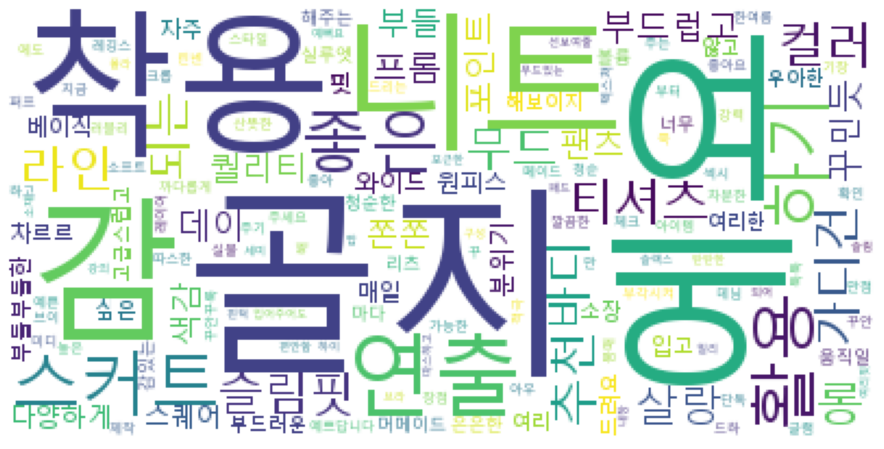

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(font_path='C:\Windows\Fonts/malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',).generate_from_frequencies(ko.vocab())

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()